In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties like correlation of the dataset.

In [21]:
# Code starts here
train= pd.read_csv(r"C:\Users\vaibh\Desktop\Python DS\Sprint 6_Move to Melbourne\file (1)\train.csv")
train.head()

,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,124,3,2,995000,1,135,6.3,3143,2,2,0,100.0,1998,26,145.01600,5,4836
1,5905,2,0,1080000,1,155,2.0,3066,1,0,0,94.0,1890,31,144.98863,2,4553
2,5963,3,0,725000,1,196,17.9,3082,2,2,602,129.0,1980,29,145.06912,2,10529
3,3521,4,0,1330000,1,251,8.0,3016,3,2,217,266.0,2003,10,144.87960,6,6380
4,3738,3,0,620000,1,221,12.4,3060,1,2,604,190.0,1970,23,144.96860,2,5070


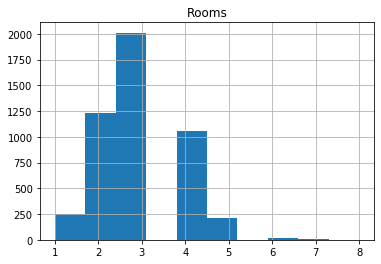

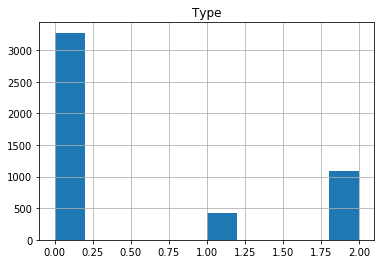

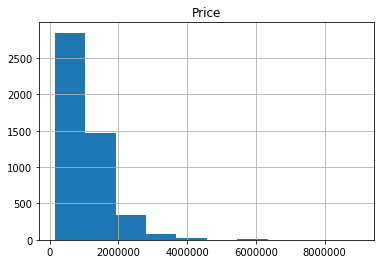

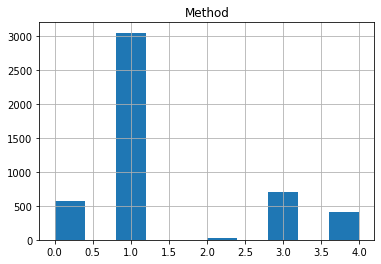

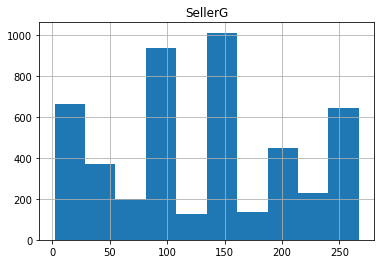

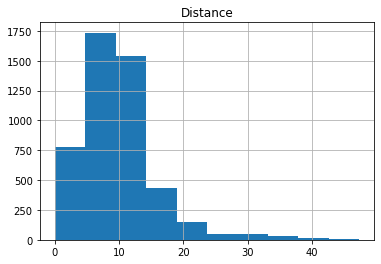

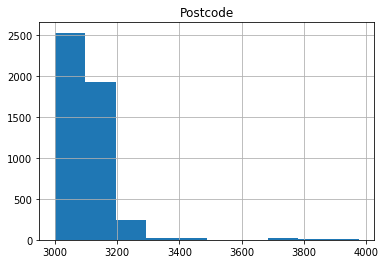

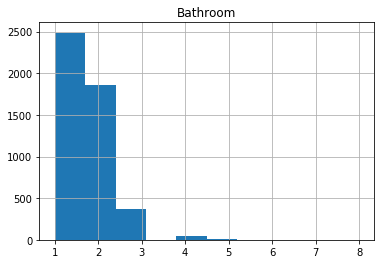

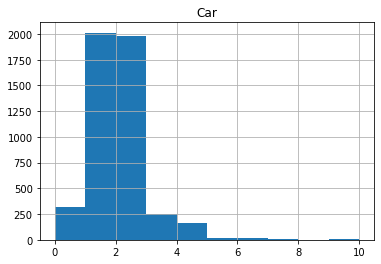

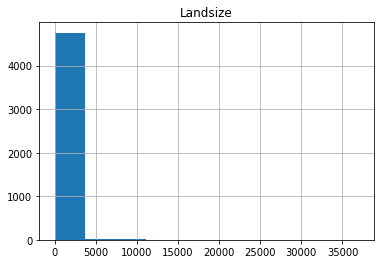

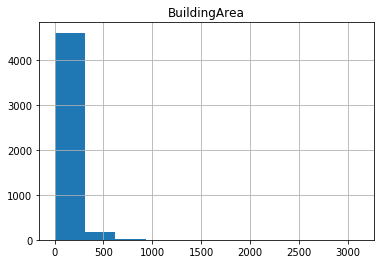

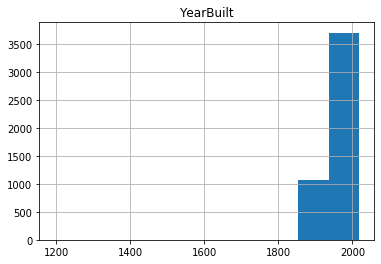

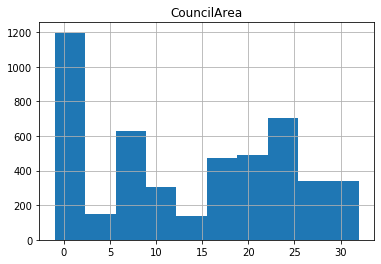

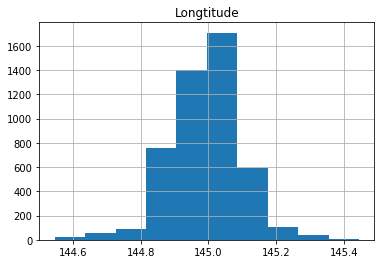

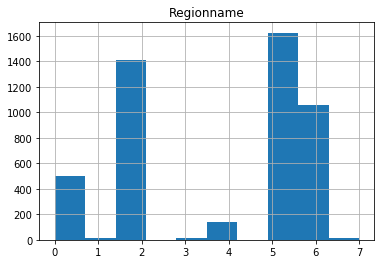

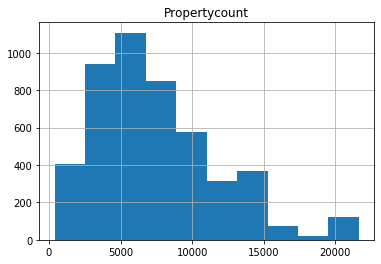

In [22]:
train.drop('Id',1,inplace=True)
for column in train.columns.tolist():
    train[column].hist()
    plt.title(column)
    plt.show()

## Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different regularization techniques.

### 1. Standardize and Run Linear Regression Model

In [23]:
from sklearn.preprocessing import StandardScaler

In [5]:
# Code starts here
# Split the train data into train and validation set
X= train.drop('Price',1)
y= train.Price

highest_r2_scr= 0
chosen_state= 0

for n in range(100):
    random_state=n
    X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=random_state,test_size=0.3)
    
    #Standardize the data
    Scaler= StandardScaler()
    X_train= Scaler.fit_transform(X_train)
    X_test= Scaler.transform(X_test)
    
    #Initialize the Linear Regression Model
    model=LinearRegression()
    
    #Polynomial Features
    poly= PolynomialFeatures()
    X_train=poly.fit_transform(X_train)
    X_test=poly.transform(X_test)
    
    #Predict the accuracy score
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    r2_scr= r2_score(y_test,pred)
    if r2_scr>highest_r2_scr:
        highest_r2_scr=r2_scr
        chosen_state=n
print("The highest r2_score using Linear Regression Model is {} with chosen random state {}".format(highest_r2_scr,chosen_state))

# Code ends here.

The highest r2_score using Linear Regression Model is 0.7731421156173466 with chosen random state 90


### 2. Use Lasso and Ridge Regularization

In [6]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [7]:
# Code starts here
# Split the train data into train and validation set
X= train.drop('Price',1)
y= train.Price

highest_r2_scr= 0
chosen_state= 0

for n in range(100):
    random_state=n
    X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=random_state,test_size=0.3)
    
    #Standardize the data
    Scaler= StandardScaler()
    X_train= Scaler.fit_transform(X_train)
    X_test= Scaler.transform(X_test)
    
    # Regularization Parameters for Grid Search
    ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
    
    #Initialize the Ridge Model
    ridge=Ridge()
    
    # grid search on ridge
    ridge_grid= GridSearchCV(estimator=ridge, param_grid=dict(alpha=ridge_lambdas))
    
    #Polynomial Features
    poly= PolynomialFeatures()
    X_train=poly.fit_transform(X_train)
    X_test=poly.transform(X_test)
    
    #Predict the accuracy score
    ridge_grid.fit(X_train,y_train)
    pred=ridge_grid.predict(X_test)
    r2_scr= r2_score(y_test,pred)  
    if r2_scr>highest_r2_scr:
        highest_r2_scr=r2_scr
        chosen_state=n
print("The highest r2_score using Ridge Model is {} with chosen random state {}".format(highest_r2_scr,chosen_state))

#Code Ends here

The highest r2_score using Ridge Model is 0.7774738088979736 with chosen random state 2


In [8]:
# Code starts here
# Split the train data into train and validation set
X= train.drop('Price',1)
y= train.Price

random_state=2
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=random_state,test_size=0.3)
    
#Standardize the data
Scaler= StandardScaler()
X_train= Scaler.fit_transform(X_train)
X_test= Scaler.transform(X_test)
    
# Regularization Parameters for Grid Search
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
    
#Initialize the Lasso Model
lasso=Lasso()
    
# Grid Search on Lasso Model
lasso_grid= GridSearchCV(estimator=lasso, param_grid=dict(alpha=lasso_lambdas))
    
#Polynomial Features
poly= PolynomialFeatures()
X_train=poly.fit_transform(X_train)
X_test=poly.transform(X_test)
    
#Predict the accuracy score
lasso_grid.fit(X_train,y_train)
pred=lasso_grid.predict(X_test)
print(r2_score(y_test,pred))  

# Code ends here.

0.7638283788119298


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

### Using the Lasso Model we get the highest R2_score

In [24]:
# Code starts here
# Load the test data and store the Id column in a separate variable.
test= pd.read_csv(r"C:\Users\vaibh\Desktop\Python DS\Sprint 6_Move to Melbourne\file (1)\test.csv")
Id= test['Id'].copy()
test.drop('Id',1,inplace=True)

In [25]:
# Code starts here
# Split the train data into train and validation set
X= train.drop('Price',1)
y= train.Price

random_state=2
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=random_state,test_size=0.3)
    
#Standardize the data
Scaler= StandardScaler()
X_train= Scaler.fit_transform(X_train)
test=Scaler.transform(test)
    
# Regularization Parameters for Grid Search
ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
    
#Initialize the Ridge Model
ridge=Ridge()
    
# grid search on ridge
ridge_grid= GridSearchCV(estimator=ridge, param_grid=dict(alpha=ridge_lambdas))
    
#Polynomial Features
poly= PolynomialFeatures()
X_train=poly.fit_transform(X_train)
test=poly.transform(test)
    
#Predict the accuracy score
ridge_grid.fit(X_train,y_train)
pred=ridge_grid.predict(test)

In [26]:
submission= pd.DataFrame({'Id':Id,'Price':pred})
submission.to_csv("First Submission.csv", index=False)